# Redes pré-treinadas em Classificação de Objetos

In [ ]:
import numpy as np
from tensorflow.keras.preprocessing import image
from tensorflow.keras.applications.resnet50 import ResNet50
from tensorflow.keras.applications.vgg16 import VGG16
from tensorflow.keras.applications.vgg19 import VGG19
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.applications.xception import Xception
from tensorflow.keras.applications.inception_resnet_v2 import InceptionResNetV2
from tensorflow.keras.applications.mobilenet import MobileNet
from tensorflow.keras.applications.mobilenet_v2 import MobileNetV2

from tensorflow.keras.applications.densenet import DenseNet121, DenseNet169, DenseNet201
from tensorflow.keras.applications.nasnet import NASNetLarge, NASNetMobile
from tensorflow.keras.preprocessing import image

In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.resnet50 import decode_predictions

### ResNet50

In [ ]:
file_path = '/content/dog.jpg'
largura=224
altura=224

img = image.load_img(file_path, target_size=(altura, largura))
input_shape = (largura, altura, 3)

In [ ]:
preprocessing_function = preprocess_input
base_model = ResNet50(weights='imagenet', include_top=True, pooling='avg', input_shape=input_shape)

102981632/102967424 [==============================] - 1s 0us/step


In [ ]:
image_arr = image.img_to_array(img)
image_reshaped = image_arr.reshape((1, image_arr.shape[0], image_arr.shape[1], image_arr.shape[2]))
preprocessed_img = preprocessing_function(image_reshaped)

yhat = base_model.predict(preprocessed_img)
label = decode_predictions(yhat)
label_1 = label[0][0]
print("%s (%.2f%%)" % (label_1[1], label_1[2]*100))
label_2 = label[0][1]
print("%s (%.2f%%)" % (label_2[1], label_2[2]*100))
label_3 = label[0][2]
print("%s (%.2f%%)" % (label_3[1], label_3[2]*100))

49152/35363 [=========================================] - 0s 0us/step
Labrador_retriever (97.38%)
golden_retriever (1.10%)
Rhodesian_ridgeback (0.17%)


### VGG16

In [ ]:
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions

file_path = '/content/dog.jpg'
largura=224
altura=224

img = image.load_img(file_path, target_size=(altura, largura))
input_shape = (largura, altura, 3)

In [ ]:
preprocessing_function = preprocess_input
base_model = VGG16(weights='imagenet', include_top=True, pooling='avg', input_shape=input_shape)

553476096/553467096 [==============================] - 4s 0us/step


In [ ]:
image_arr = image.img_to_array(img)
image_reshaped = image_arr.reshape((1, image_arr.shape[0], image_arr.shape[1], image_arr.shape[2]))
preprocessed_img = preprocessing_function(image_reshaped)

In [ ]:
yhat = base_model.predict(preprocessed_img)
label = decode_predictions(yhat)
label_1 = label[0][0]
print("%s (%.2f%%)" % (label_1[1], label_1[2]*100))
label_2 = label[0][1]
print("%s (%.2f%%)" % (label_2[1], label_2[2]*100))
label_3 = label[0][2]
print("%s (%.2f%%)" % (label_3[1], label_3[2]*100))

Labrador_retriever (81.23%)
golden_retriever (16.08%)
kuvasz (1.05%)


### Inception V3

In [ ]:
from tensorflow.keras.applications.inception_v3 import preprocess_input, decode_predictions

In [ ]:
file_path = '/content/dog.jpg'
largura=299
altura=299

img = image.load_img(file_path, target_size=(altura, largura))
input_shape = (largura, altura, 3)

In [ ]:
preprocessing_function = preprocess_input
base_model = InceptionV3(weights='imagenet', include_top=True, pooling='avg', input_shape=input_shape)

In [ ]:
image_arr = image.img_to_array(img)
image_reshaped = image_arr.reshape((1, image_arr.shape[0], image_arr.shape[1], image_arr.shape[2]))
preprocessed_img = preprocessing_function(image_reshaped)

In [ ]:
yhat = base_model.predict(preprocessed_img)
label = decode_predictions(yhat)
label_1 = label[0][0]
print("%s (%.2f%%)" % (label_1[1], label_1[2]*100))
label_2 = label[0][1]
print("%s (%.2f%%)" % (label_2[1], label_2[2]*100))
label_3 = label[0][2]
print("%s (%.2f%%)" % (label_3[1], label_3[2]*100))

Labrador_retriever (95.04%)
golden_retriever (1.21%)
kuvasz (0.14%)


# Extração de Características

###VGG16

In [ ]:
from tensorflow.keras.applications.vgg16 import preprocess_input
from tensorflow.keras.applications.vgg16 import decode_predictions

file_path = '/content/dog.jpg'
largura=224
altura=224

img = image.load_img(file_path, target_size=(altura, largura))
input_shape = (largura, altura, 3)

In [ ]:
preprocessing_function = preprocess_input
base_model = VGG16(weights='imagenet', include_top=False, pooling='max', input_shape=input_shape)

58900480/58889256 [==============================] - 0s 0us/step


In [ ]:
base_model.summary()

Model: "vgg16"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_8 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)       0     

In [ ]:
image_arr = image.img_to_array(img)
image_reshaped = image_arr.reshape((1, image_arr.shape[0], image_arr.shape[1], image_arr.shape[2]))
preprocessed_img = preprocessing_function(image_reshaped)

In [ ]:
feature_array  = base_model.predict(preprocessed_img)
feature_from_image = feature_array.flatten()

print(len(feature_from_image))
print(feature_from_image[:30])

512
[221.3987     60.568134   50.11618     5.7686887  35.531605   34.54532
   5.635649    7.347756    9.572355    3.041575   92.48961     0.
  44.13724   123.01081     0.         11.103366   61.653446    1.6433733
   4.1360507  54.596676    8.7121105   0.          0.         69.61515
  35.836765   31.518631   17.906155   31.54968    46.768944   10.741026 ]


### ResNet50

In [ ]:
from tensorflow.keras.applications.resnet50 import preprocess_input
from tensorflow.keras.applications.resnet50 import decode_predictions

file_path = '/content/dog.jpg'
largura=224
altura=224

img = image.load_img(file_path, target_size=(altura, largura))
input_shape = (largura, altura, 3)

In [ ]:
preprocessing_function = preprocess_input
base_model = ResNet50(weights='imagenet', include_top=False, pooling='max', input_shape=input_shape)

In [ ]:
base_model.summary()

Model: "resnet50"
__________________________________________________________________________________________________
Layer (type)                    Output Shape         Param #     Connected to                     
input_9 (InputLayer)            [(None, 224, 224, 3) 0                                            
__________________________________________________________________________________________________
conv1_pad (ZeroPadding2D)       (None, 230, 230, 3)  0           input_9[0][0]                    
__________________________________________________________________________________________________
conv1_conv (Conv2D)             (None, 112, 112, 64) 9472        conv1_pad[0][0]                  
__________________________________________________________________________________________________
conv1_bn (BatchNormalization)   (None, 112, 112, 64) 256         conv1_conv[0][0]                 
___________________________________________________________________________________________

In [ ]:
image_arr = image.img_to_array(img)
image_reshaped = image_arr.reshape((1, image_arr.shape[0], image_arr.shape[1], image_arr.shape[2]))
preprocessed_img = preprocessing_function(image_reshaped)

In [ ]:
feature_array  = base_model.predict(preprocessed_img)
feature_from_image = feature_array.flatten()

print(len(feature_from_image))
print(feature_from_image[:30])

2048
[2.4601417e+00 2.2948556e+00 6.6213608e-01 6.8762851e+00 2.6855364e+00
 3.4600081e+00 4.3522841e-01 1.0334520e+00 1.1606910e+00 4.0818763e+00
 0.0000000e+00 1.5745534e-01 0.0000000e+00 0.0000000e+00 0.0000000e+00
 8.4214985e-01 0.0000000e+00 3.8996391e+00 1.0117485e+01 1.8864989e+00
 3.9252219e+00 5.1779575e+00 7.4465275e-03 4.2890263e+00 6.0207880e-01
 2.7199929e+00 1.5915983e+00 1.0412375e+00 4.5548363e+00 3.9605682e+00]


In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.datasets.samples_generator import make_blobs
from sklearn.cluster import KMeans

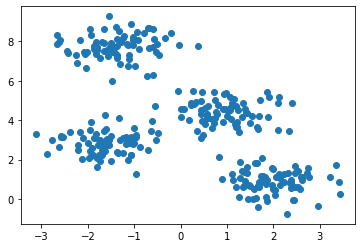

In [ ]:
X, y = make_blobs(n_samples=300, centers=4, cluster_std=0.6, random_state=0)
plt.scatter(X[:, 0], X[:, 1])

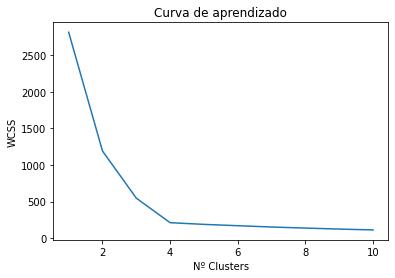

In [ ]:
wcss = []
for i in range(1, 11):
  kmeans = KMeans(n_clusters=i, init='k-means++', max_iter=300, n_init=10, random_state=0)
  kmeans.fit(X)
  wcss.append(kmeans.inertia_)

plt.plot(range(1, 11), wcss)
plt.title('Curva de aprendizado')
plt.xlabel('Nº Clusters')
plt.ylabel('WCSS')
plt.show()

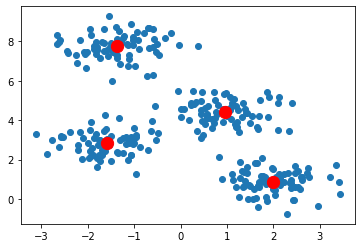

In [ ]:
kmeans = KMeans(n_clusters=4, init='k-means++', max_iter=300, n_init=10, random_state=0)
pred_y = kmeans.fit_predict(X)
plt.scatter(X[:, 0], X[:, 1])
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], s=150, c='red')
plt.show()